In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel(r'C:\Users\LENOVO\Downloads\CLC_train.xlsx')

In [3]:
data.head()

,Date,Time,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,CO_level
0,2004-11-23,19:00:00,11.9,2008,-200,50.6,1980,1389,325,220,2562,2342,12.4,74.7,1.0741,Very High
1,2004-11-23,20:00:00,11.5,1918,-200,49.4,1958,1358,335,190,2477,2237,11.5,76.2,1.0324,Very High
2,2004-11-17,18:00:00,10.2,1802,-200,47.7,1924,748,356,192,2235,2452,13.7,52.8,0.8244,Very High
3,2004-11-23,18:00:00,10.2,1982,-200,49.5,1959,1369,322,227,2536,2386,13.2,72.6,1.0936,Very High
4,2004-11-26,18:00:00,10.1,1956,-200,45.2,1877,1389,347,255,2338,2465,15.5,62.8,1.0979,Very High


In [4]:
data.isnull().sum()

Date            0
Time            0
CO_GT           0
PT08_S1_CO      0
NMHC_GT         0
C6H6_GT         0
PT08_S2_NMHC    0
Nox_GT          0
PT08_S3_Nox     0
NO2_GT          0
PT08_S4_NO2     0
PT08_S5_O3      0
T               0
RH              0
AH              0
CO_level        0
dtype: int64

In [5]:
data.dtypes

Date            datetime64[ns]
Time                    object
CO_GT                  float64
PT08_S1_CO               int64
NMHC_GT                  int64
C6H6_GT                float64
PT08_S2_NMHC             int64
Nox_GT                   int64
PT08_S3_Nox              int64
NO2_GT                   int64
PT08_S4_NO2              int64
PT08_S5_O3               int64
T                      float64
RH                     float64
AH                     float64
CO_level                object
dtype: object

In [6]:
data['Date_year']=data['Date'].dt.year
data['Date_month'] = data['Date'].dt.month
data['Date_week'] = data['Date'].dt.week
data['Date_day'] = data['Date'].dt.day

In [7]:
data['Date'] = data['Date'].dt.date

In [8]:
data.dtypes

Date             object
Time             object
CO_GT           float64
PT08_S1_CO        int64
NMHC_GT           int64
C6H6_GT         float64
PT08_S2_NMHC      int64
Nox_GT            int64
PT08_S3_Nox       int64
NO2_GT            int64
PT08_S4_NO2       int64
PT08_S5_O3        int64
T               float64
RH              float64
AH              float64
CO_level         object
Date_year         int64
Date_month        int64
Date_week         int64
Date_day          int64
dtype: object

In [9]:
data.head()

,Date,Time,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,CO_level,Date_year,Date_month,Date_week,Date_day
0,2004-11-23,19:00:00,11.9,2008,-200,50.6,1980,1389,325,220,2562,2342,12.4,74.7,1.0741,Very High,2004,11,48,23
1,2004-11-23,20:00:00,11.5,1918,-200,49.4,1958,1358,335,190,2477,2237,11.5,76.2,1.0324,Very High,2004,11,48,23
2,2004-11-17,18:00:00,10.2,1802,-200,47.7,1924,748,356,192,2235,2452,13.7,52.8,0.8244,Very High,2004,11,47,17
3,2004-11-23,18:00:00,10.2,1982,-200,49.5,1959,1369,322,227,2536,2386,13.2,72.6,1.0936,Very High,2004,11,48,23
4,2004-11-26,18:00:00,10.1,1956,-200,45.2,1877,1389,347,255,2338,2465,15.5,62.8,1.0979,Very High,2004,11,48,26


In [10]:
data=data.drop(columns=['Date'])

In [11]:
data.shape

(7485, 19)

In [12]:
data['Time'].unique()

array([datetime.time(19, 0), datetime.time(20, 0), datetime.time(18, 0),
       datetime.time(21, 0), datetime.time(17, 0), datetime.time(9, 0),
       datetime.time(14, 0), datetime.time(8, 0), datetime.time(16, 0),
       datetime.time(13, 0), datetime.time(10, 0), datetime.time(11, 0),
       datetime.time(15, 0), datetime.time(12, 0), datetime.time(0, 0),
       datetime.time(7, 0), datetime.time(1, 0), datetime.time(2, 0),
       datetime.time(23, 0), datetime.time(22, 0), datetime.time(3, 0),
       datetime.time(6, 0), datetime.time(5, 0), datetime.time(4, 0)],
      dtype=object)

In [13]:
data['Split']=data['Time'].astype(str).str.split(':')

In [14]:
data.head()

,Time,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,CO_level,Date_year,Date_month,Date_week,Date_day,Split
0,19:00:00,11.9,2008,-200,50.6,1980,1389,325,220,2562,2342,12.4,74.7,1.0741,Very High,2004,11,48,23,"[19, 00, 00]"
1,20:00:00,11.5,1918,-200,49.4,1958,1358,335,190,2477,2237,11.5,76.2,1.0324,Very High,2004,11,48,23,"[20, 00, 00]"
2,18:00:00,10.2,1802,-200,47.7,1924,748,356,192,2235,2452,13.7,52.8,0.8244,Very High,2004,11,47,17,"[18, 00, 00]"
3,18:00:00,10.2,1982,-200,49.5,1959,1369,322,227,2536,2386,13.2,72.6,1.0936,Very High,2004,11,48,23,"[18, 00, 00]"
4,18:00:00,10.1,1956,-200,45.2,1877,1389,347,255,2338,2465,15.5,62.8,1.0979,Very High,2004,11,48,26,"[18, 00, 00]"


In [15]:
data['Time_hour']=data['Split'].map(lambda x:x[0].strip())

In [16]:
data.head()

,Time,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,...,T,RH,AH,CO_level,Date_year,Date_month,Date_week,Date_day,Split,Time_hour
0,19:00:00,11.9,2008,-200,50.6,1980,1389,325,220,2562,...,12.4,74.7,1.0741,Very High,2004,11,48,23,"[19, 00, 00]",19
1,20:00:00,11.5,1918,-200,49.4,1958,1358,335,190,2477,...,11.5,76.2,1.0324,Very High,2004,11,48,23,"[20, 00, 00]",20
2,18:00:00,10.2,1802,-200,47.7,1924,748,356,192,2235,...,13.7,52.8,0.8244,Very High,2004,11,47,17,"[18, 00, 00]",18
3,18:00:00,10.2,1982,-200,49.5,1959,1369,322,227,2536,...,13.2,72.6,1.0936,Very High,2004,11,48,23,"[18, 00, 00]",18
4,18:00:00,10.1,1956,-200,45.2,1877,1389,347,255,2338,...,15.5,62.8,1.0979,Very High,2004,11,48,26,"[18, 00, 00]",18


In [17]:
data['Time_min']=data['Split'].map(lambda x:x[1].strip())

In [18]:
data['Time_sec']=data['Split'].map(lambda x:x[2].strip())

In [19]:
data=data.drop(columns=['Split'])

In [20]:
data.head()

,Time,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,...,RH,AH,CO_level,Date_year,Date_month,Date_week,Date_day,Time_hour,Time_min,Time_sec
0,19:00:00,11.9,2008,-200,50.6,1980,1389,325,220,2562,...,74.7,1.0741,Very High,2004,11,48,23,19,00,00
1,20:00:00,11.5,1918,-200,49.4,1958,1358,335,190,2477,...,76.2,1.0324,Very High,2004,11,48,23,20,00,00
2,18:00:00,10.2,1802,-200,47.7,1924,748,356,192,2235,...,52.8,0.8244,Very High,2004,11,47,17,18,00,00
3,18:00:00,10.2,1982,-200,49.5,1959,1369,322,227,2536,...,72.6,1.0936,Very High,2004,11,48,23,18,00,00
4,18:00:00,10.1,1956,-200,45.2,1877,1389,347,255,2338,...,62.8,1.0979,Very High,2004,11,48,26,18,00,00


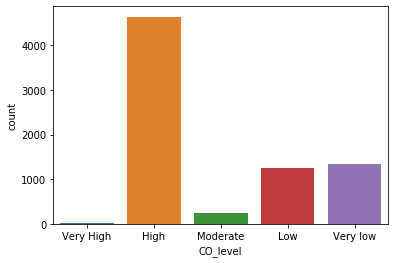

In [21]:
import seaborn as sns
sns.countplot(x="CO_level", data=data)

In [22]:
x=data['CO_level']
print(x)

0       Very High
1       Very High
2       Very High
3       Very High
4       Very High
          ...    
7480     Very low
7481     Very low
7482     Very low
7483     Very low
7484     Very low
Name: CO_level, Length: 7485, dtype: object


In [23]:
for i in range(len(x)):
    if(x[i]=='Very High'):
        x[i]='High'
    elif(x[i]=='Moderate'):
        x[i]='Low'
    elif(x[i]=='Very low'):
        x[i]='Low'

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [24]:
print(x)

0       High
1       High
2       High
3       High
4       High
        ... 
7480     Low
7481     Low
7482     Low
7483     Low
7484     Low
Name: CO_level, Length: 7485, dtype: object


In [25]:
data['CO_level']=x

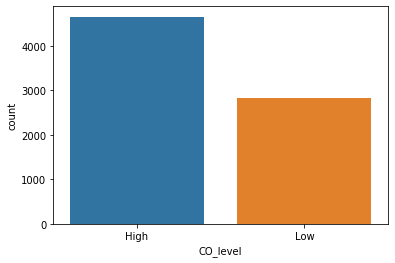

In [26]:
sns.countplot(x="CO_level", data=data)

In [27]:
data.dtypes

Time             object
CO_GT           float64
PT08_S1_CO        int64
NMHC_GT           int64
C6H6_GT         float64
PT08_S2_NMHC      int64
Nox_GT            int64
PT08_S3_Nox       int64
NO2_GT            int64
PT08_S4_NO2       int64
PT08_S5_O3        int64
T               float64
RH              float64
AH              float64
CO_level         object
Date_year         int64
Date_month        int64
Date_week         int64
Date_day          int64
Time_hour        object
Time_min         object
Time_sec         object
dtype: object

In [28]:
data=data.drop(columns=['Time'])

In [29]:
data['Time_min'].unique()

array(['00'], dtype=object)

In [30]:
data.isnull().sum()

CO_GT           0
PT08_S1_CO      0
NMHC_GT         0
C6H6_GT         0
PT08_S2_NMHC    0
Nox_GT          0
PT08_S3_Nox     0
NO2_GT          0
PT08_S4_NO2     0
PT08_S5_O3      0
T               0
RH              0
AH              0
CO_level        0
Date_year       0
Date_month      0
Date_week       0
Date_day        0
Time_hour       0
Time_min        0
Time_sec        0
dtype: int64

In [31]:
data=data.apply(pd.to_numeric,errors="ignore")
data.dtypes

CO_GT           float64
PT08_S1_CO        int64
NMHC_GT           int64
C6H6_GT         float64
PT08_S2_NMHC      int64
Nox_GT            int64
PT08_S3_Nox       int64
NO2_GT            int64
PT08_S4_NO2       int64
PT08_S5_O3        int64
T               float64
RH              float64
AH              float64
CO_level         object
Date_year         int64
Date_month        int64
Date_week         int64
Date_day          int64
Time_hour         int64
Time_min          int64
Time_sec          int64
dtype: object

In [32]:
data=data.drop(columns=['Time_min','Time_sec'])

In [33]:
from sklearn.preprocessing import LabelEncoder
a=LabelEncoder()
data['CO_level']=a.fit_transform(data['CO_level'])

In [34]:
data.head()

,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,CO_level,Date_year,Date_month,Date_week,Date_day,Time_hour
0,11.9,2008,-200,50.6,1980,1389,325,220,2562,2342,12.4,74.7,1.0741,0,2004,11,48,23,19
1,11.5,1918,-200,49.4,1958,1358,335,190,2477,2237,11.5,76.2,1.0324,0,2004,11,48,23,20
2,10.2,1802,-200,47.7,1924,748,356,192,2235,2452,13.7,52.8,0.8244,0,2004,11,47,17,18
3,10.2,1982,-200,49.5,1959,1369,322,227,2536,2386,13.2,72.6,1.0936,0,2004,11,48,23,18
4,10.1,1956,-200,45.2,1877,1389,347,255,2338,2465,15.5,62.8,1.0979,0,2004,11,48,26,18


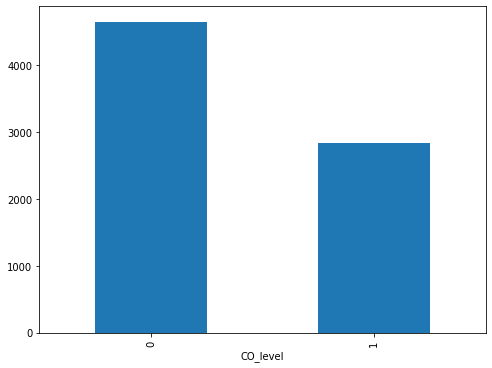

In [35]:
fig = plt.figure(figsize=(8,6))
data.groupby('CO_level')["CO_GT"].count().plot.bar(ylim=0)
plt.show()

In [36]:
data['CO_level'].unique()

array([0, 1], dtype=int64)

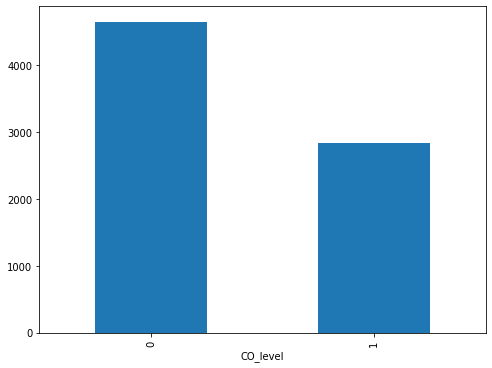

In [37]:
fig = plt.figure(figsize=(8,6))
data.groupby('CO_level')["NMHC_GT"].count().plot.bar(ylim=0)
plt.show()

In [38]:
data.columns

Index(['CO_GT', 'PT08_S1_CO', 'NMHC_GT', 'C6H6_GT', 'PT08_S2_NMHC', 'Nox_GT',
       'PT08_S3_Nox', 'NO2_GT', 'PT08_S4_NO2', 'PT08_S5_O3', 'T', 'RH', 'AH',
       'CO_level', 'Date_year', 'Date_month', 'Date_week', 'Date_day',
       'Time_hour'],
      dtype='object')

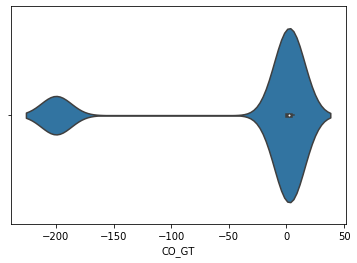

In [39]:
sns.violinplot(x=data["CO_GT"])

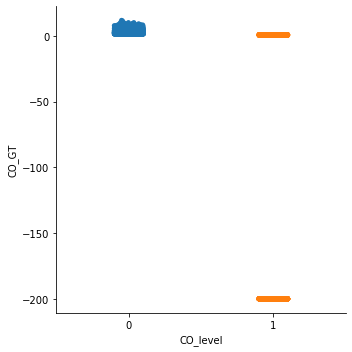

In [40]:
sns.catplot(x="CO_level",y="CO_GT",data=data)

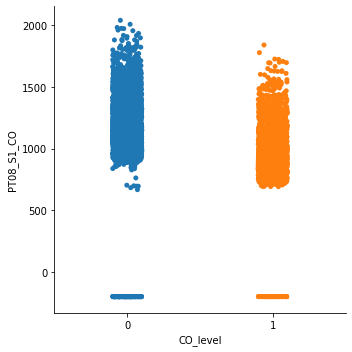

In [41]:
sns.catplot(x="CO_level",y="PT08_S1_CO",data=data)

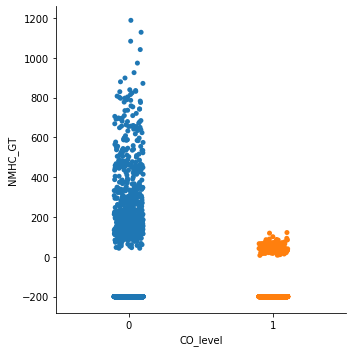

In [42]:
sns.catplot(x="CO_level",y="NMHC_GT",data=data)

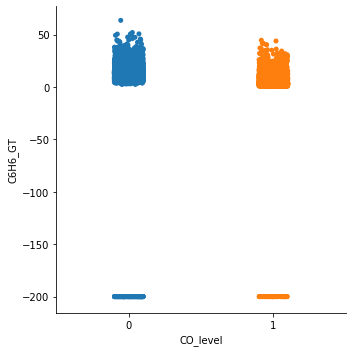

In [43]:
sns.catplot(x="CO_level",y="C6H6_GT",data=data)

In [44]:
train=data.drop(columns=['CO_level'])
test=data['CO_level']

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train,test,test_size=0.2)

In [46]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [52]:
model = DecisionTreeClassifier()
param = {'max_depth':[2,4,6,9,10,15],}
gsc = GridSearchCV(estimator=model, param_grid=param, cv=5, scoring='accuracy', verbose=0, n_jobs=-1)
grid_result = gsc.fit(x_train, y_train)
print('Best Param', grid_result.best_params_)

Best Param {'max_depth': 2}


In [53]:
y_pred = grid_result.best_estimator_.predict(x_test)
print(y_pred.shape)
print('Accuracy', accuracy_score(y_test, y_pred))
print("classification Report:\n",classification_report(y_test,y_pred))
print('Confusion Matrix \n' , confusion_matrix(y_test, y_pred))

(1497,)
Accuracy 0.8256513026052105
classification Report:
               precision    recall  f1-score   support

           0       1.00      0.73      0.84       965
           1       0.67      1.00      0.80       532

    accuracy                           0.83      1497
   macro avg       0.84      0.86      0.82      1497
weighted avg       0.88      0.83      0.83      1497

Confusion Matrix 
 [[704 261]
 [  0 532]]


In [54]:
model = RandomForestClassifier()
param = {'n_estimators':[2,4,6,9,10,15,20],}
gsc = GridSearchCV(estimator=model, param_grid=param, cv=5, scoring='accuracy', verbose=0, n_jobs=-1)
grid_result = gsc.fit(x_train, y_train)
print('Best Param', grid_result.best_params_)

Best Param {'n_estimators': 15}


In [55]:
y_pred = grid_result.best_estimator_.predict(x_test)
print(y_pred.shape)
print('Accuracy', accuracy_score(y_test, y_pred))
print("classification Report:\n",classification_report(y_test,y_pred))
print('Confusion Matrix \n' , confusion_matrix(y_test, y_pred))

(1497,)
Accuracy 0.8256513026052105
classification Report:
               precision    recall  f1-score   support

           0       1.00      0.73      0.84       965
           1       0.67      1.00      0.80       532

    accuracy                           0.83      1497
   macro avg       0.84      0.86      0.82      1497
weighted avg       0.88      0.83      0.83      1497

Confusion Matrix 
 [[704 261]
 [  0 532]]


In [56]:
model = SVC()
param = {'kernel':['rbf'], 'C':[1,5,10,15, 20], 'coef0':[0.001, 0.01,0.1, 0.5, 1]}
gsc = GridSearchCV(estimator=model,param_grid=param, cv=5, scoring='accuracy', verbose=0, n_jobs=-1)
grid_result = gsc.fit(x_train, y_train)
print('Best Param', grid_result.best_params_)

Best Param {'C': 15, 'coef0': 0.001, 'kernel': 'rbf'}


In [58]:
y_pred = grid_result.best_estimator_.predict(x_test)
print(y_pred.shape)
print('Accuracy', accuracy_score(y_test, y_pred))
print("classification Report:\n",classification_report(y_test,y_pred))
print('Confusion Matrix \n' , confusion_matrix(y_test, y_pred))

(1497,)
Accuracy 0.9846359385437542
classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.98      0.98      0.98       532

    accuracy                           0.98      1497
   macro avg       0.98      0.98      0.98      1497
weighted avg       0.98      0.98      0.98      1497

Confusion Matrix 
 [[954  11]
 [ 12 520]]
